**BUSINESS** **UNDERSTANDING**



Data on the protein distribution in various products was collected and analyzed to create a model that accurately predicts their total protein content.

**DATA UNDERSTANDING**

In [ ]:
#data loading
import pandas as pd
#define the file path
pc=pd.read_table("/content/protein (1).txt")
#use to_string function to remove the table-like columns and rows
print(pc.to_string())

           Country  RedMeat  WhiteMeat  Eggs  Milk  Fish  Cereals  Starch  Nuts  Fr&Veg
0          Albania     10.1        1.4   0.5   8.9   0.2     42.3     0.6   5.5     1.7
1          Austria      8.9       14.0   4.3  19.9   2.1     28.0     3.6   1.3     4.3
2          Belgium     13.5        9.3   4.1  17.5   4.5     26.6     5.7   2.1     4.0
3         Bulgaria      7.8        6.0   1.6   8.3   1.2     56.7     1.1   3.7     4.2
4   Czechoslovakia      9.7       11.4   2.8  12.5   2.0     34.3     5.0   1.1     4.0
5          Denmark     10.6       10.8   3.7  25.0   9.9     21.9     4.8   0.7     2.4
6        E Germany      8.4       11.6   3.7  11.1   5.4     24.6     6.5   0.8     3.6
7          Finland      9.5        4.9   2.7  33.7   5.8     26.3     5.1   1.0     1.4
8           France     18.0        9.9   3.3  19.5   5.7     28.1     4.8   2.4     6.5
9           Greece     10.2        3.0   2.8  17.6   5.9     41.7     2.2   7.8     6.5
10         Hungary      5.3     

I have imported pandas library and defined the file path. The data set contains 25 rows and 10 columns.



In [ ]:
#head
pc.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


The dataset consists of 10 columns and the first five rows are shown.

In [ ]:
#tail
pc.tail()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
20,Switzerland,13.1,10.1,3.1,23.8,2.3,25.6,2.8,2.4,4.9
21,UK,17.4,5.7,4.7,20.6,4.3,24.3,4.7,3.4,3.3
22,USSR,9.3,4.6,2.1,16.6,3.0,43.6,6.4,3.4,2.9
23,W Germany,11.4,12.5,4.1,18.8,3.4,18.6,5.2,1.5,3.8
24,Yugoslavia,4.4,5.0,1.2,9.5,0.6,55.9,3.0,5.7,3.2


The last five rows of the dataset are shown

In [ ]:
#Dataset information
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    25 non-null     object 
 1   RedMeat    25 non-null     float64
 2   WhiteMeat  25 non-null     float64
 3   Eggs       25 non-null     float64
 4   Milk       25 non-null     float64
 5   Fish       25 non-null     float64
 6   Cereals    25 non-null     float64
 7   Starch     25 non-null     float64
 8   Nuts       25 non-null     float64
 9   Fr&Veg     25 non-null     float64
dtypes: float64(9), object(1)
memory usage: 2.1+ KB


The dataset contains 25 entries with two data types: object and float. It occupies 2.1 kilobytes of storage

**DATA CLEANING**

In [ ]:
#missing values
pc.isnull().sum()

Country      0
RedMeat      0
WhiteMeat    0
Eggs         0
Milk         0
Fish         0
Cereals      0
Starch       0
Nuts         0
Fr&Veg       0
dtype: int64

There are no missing values in the dataset

In [ ]:
#Duplicates
pc.duplicated().sum()

0

There are no duplicated values in the dataset

In [ ]:
#checking for outliers
import pandas as pd
#Obtaining the z-score for each numeric column
z_scores = pc.select_dtypes(include=['number']).apply(lambda x: (x - x.mean()) / x.std())
#setting a threshold for outlier detection
threshold = 3
#Counting outliers in each column
outliers = (z_scores > threshold).sum()
# Print the number of outliers in each column
print("\nNumber of outliers in each column:")
print(outliers)


Number of outliers in each column:
RedMeat      0
WhiteMeat    0
Eggs         0
Milk         0
Fish         0
Cereals      0
Starch       0
Nuts         0
Fr&Veg       0
dtype: int64


There are no outliers in the dataset

**EXPLORATORY DATA ANALYSIS**

In [ ]:
#Data summary statistics
pc.describe()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,9.828000,7.896000,2.936000,17.112000,4.284000,32.248000,4.276000,3.072000,4.136000
std,3.347078,3.694081,1.117617,7.105416,3.402533,10.974786,1.634085,1.985682,1.803903
min,4.400000,1.400000,0.500000,4.900000,0.200000,18.600000,0.600000,0.700000,1.400000
25%,7.800000,4.900000,2.700000,11.100000,2.100000,24.300000,3.100000,1.500000,2.900000
50%,9.500000,7.800000,2.900000,17.600000,3.400000,28.000000,4.700000,2.400000,3.800000
75%,10.600000,10.800000,3.700000,23.300000,5.800000,40.100000,5.700000,4.700000,4.900000
max,18.000000,14.000000,4.700000,33.700000,14.200000,56.700000,6.500000,7.800000,7.900000


The summary statistics show the count (25 for all columns), the mean value for each column, with Cereals having the highest mean at 32.248 and Nuts the lowest at 3.072. It also includes the standard deviation for each column, as well as the minimum, 25th percentile, 50th percentile, 75th percentile, and maximum values for each column.

**DATA VISUALIZATION**

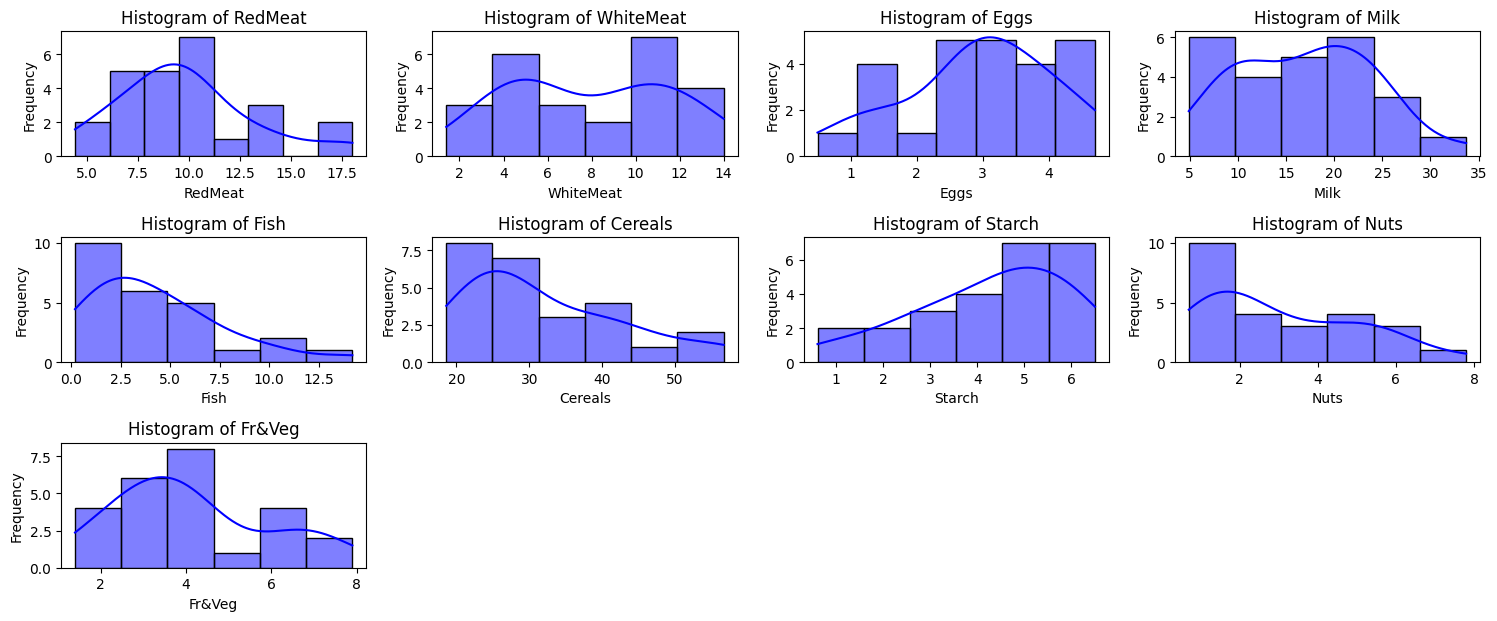

In [ ]:
#setting aside numeric columns in pc dataset
numeric_pc = pc.iloc[:, 1:]

#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

#plotting histograms for each column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_pc.columns):
    plt.subplot(5, 4, i + 1)
    sns.histplot(data=pc, x=column, kde=True,color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The histograms displayed show the variation in protein content across different products. Milk generally has a high protein content, whereas nuts have a comparatively low protein content.

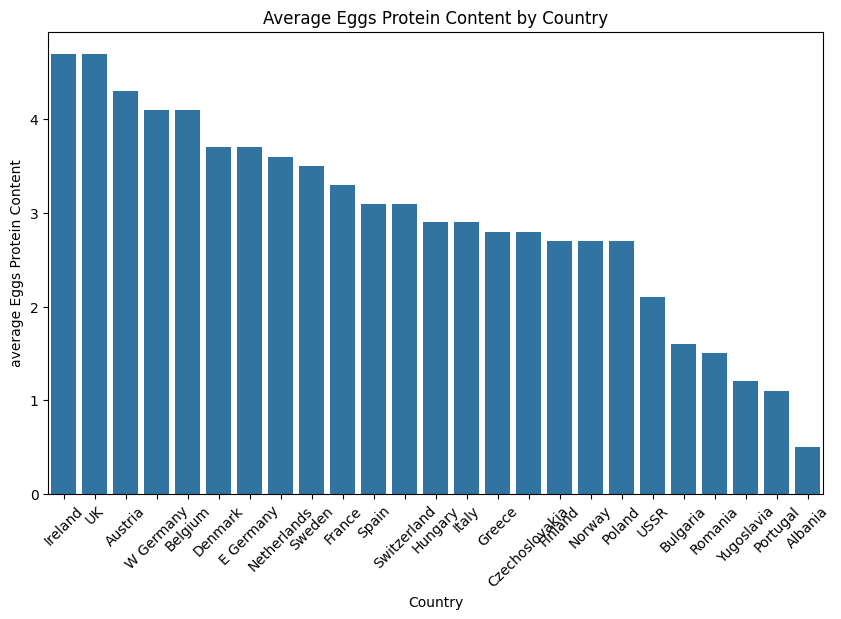

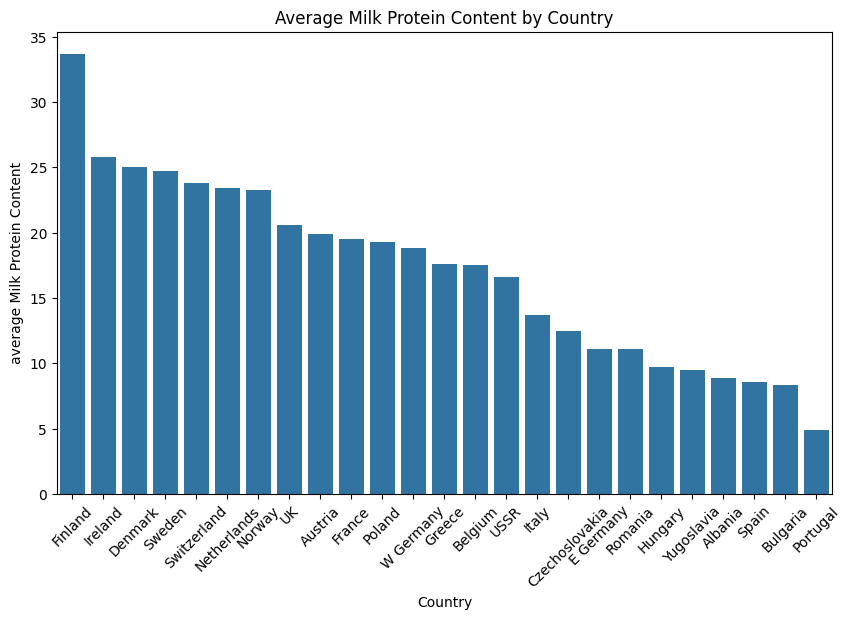

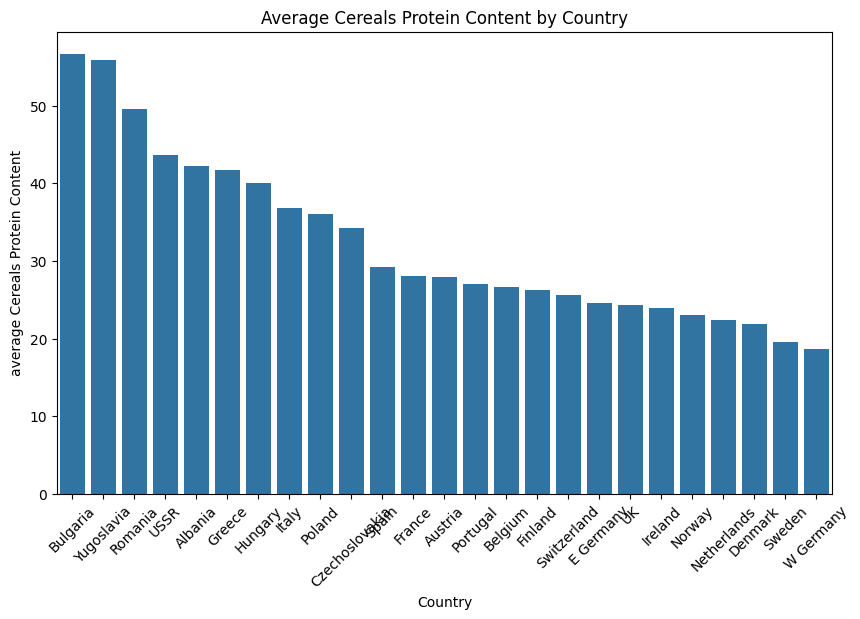

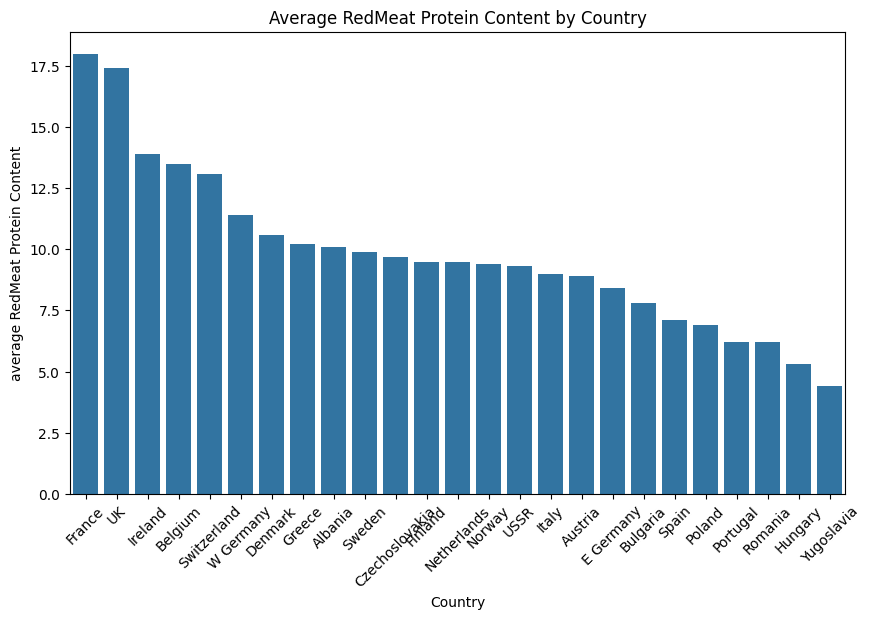

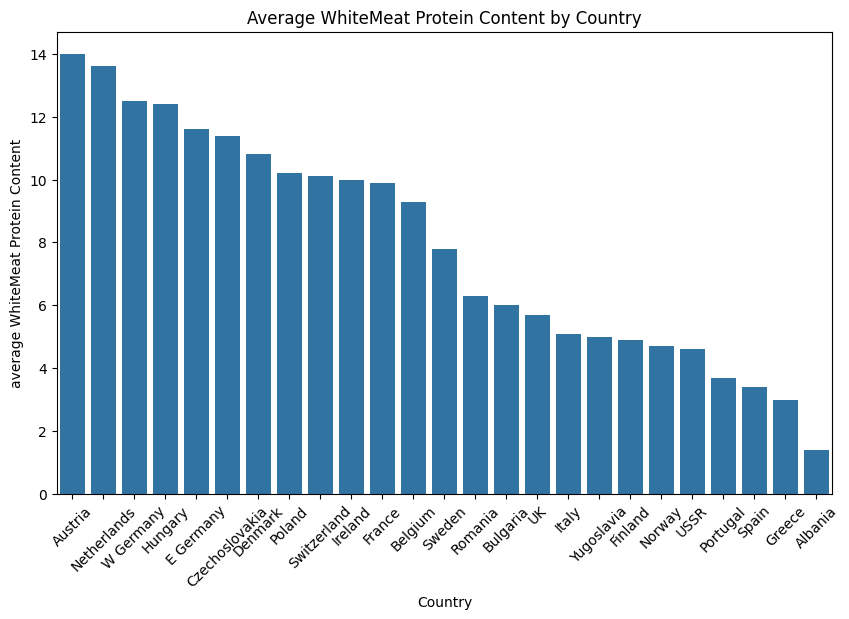

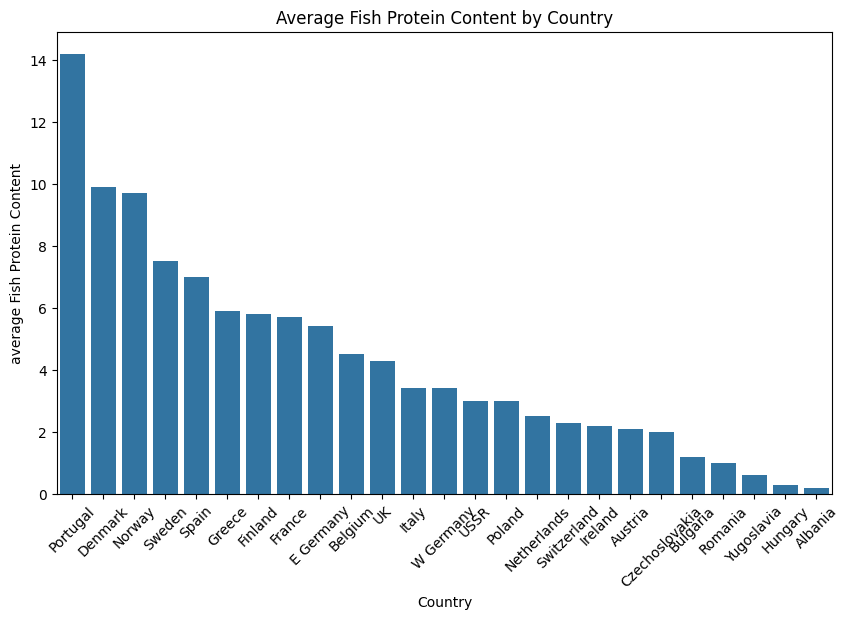

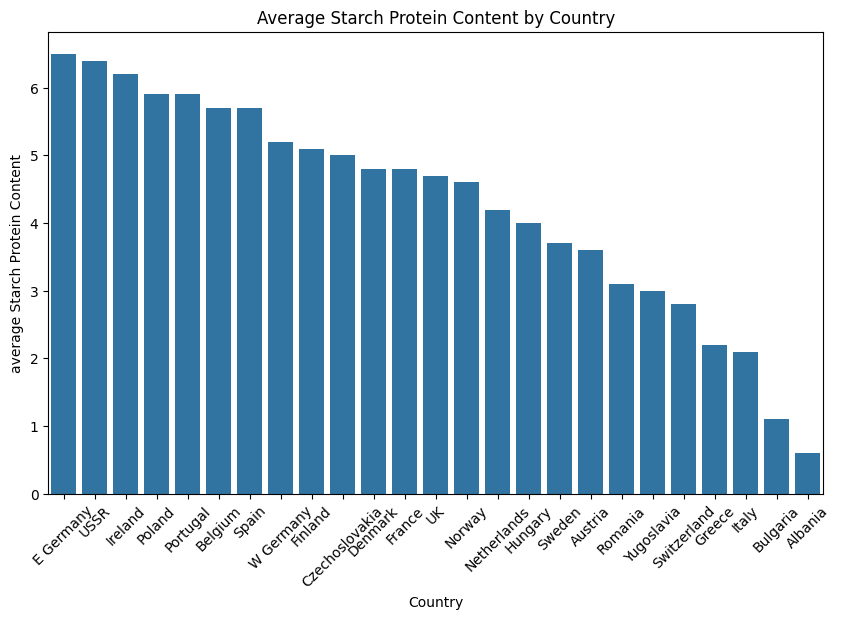

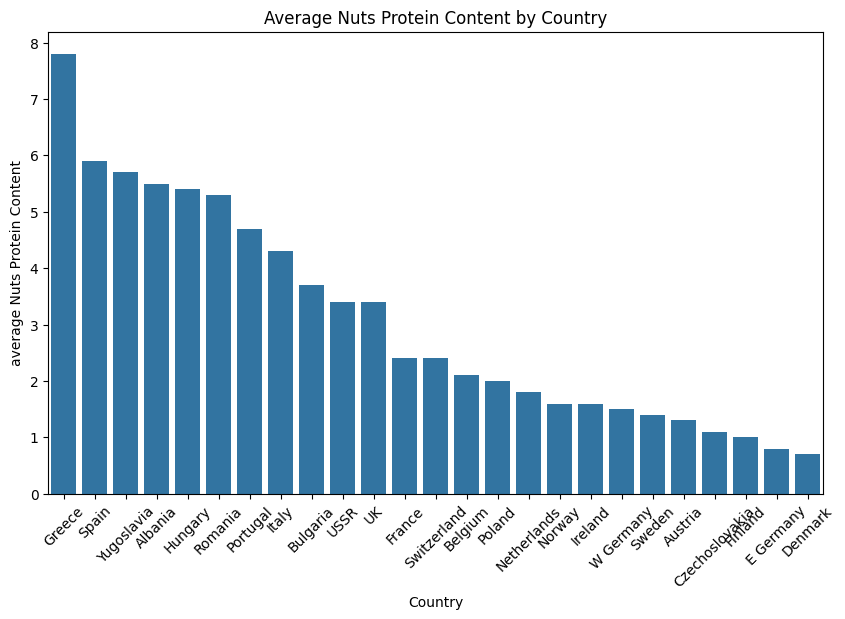

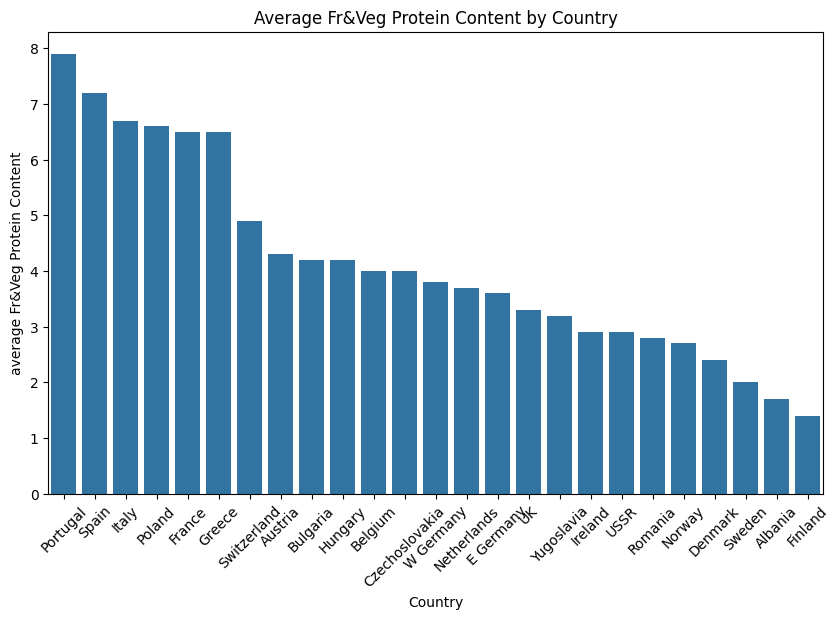

In [ ]:
#bar graph
#protein content analysis by country

average_protein = pc.groupby('Country')[
                                                     ['Eggs',
                                                      'Milk',
                                                      'Cereals',
                                                      'RedMeat',
                                                      'WhiteMeat',
                                                      'Fish',
                                                      'Starch',
                                                      'Nuts',
                                                      'Fr&Veg']
                                                           ].mean()

# Iterate over columns and create a bar chart for each
for column in average_protein.columns:
#Arrange the data by average protein content for the current column
    sorted_data = average_protein.sort_values(by=column, ascending=False)

# display bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=sorted_data.index, y=sorted_data[column])

#Titles and labels for the bar charts
    plt.title(f'Average {column} Protein Content by Country')
    plt.xlabel('Country')
    plt.ylabel(f'average {column} Protein Content')
#Rotation of x axis for easier visualisation
    plt.xticks(rotation=45)

    plt.show()

The bar charts illustrate the average protein content in each product across different countries:

Milk: Highest in Finland, lowest in Portugal.

Cereals: Highest in Bulgaria, lowest in West Germany.

Red meat: Highest in France, lowest in Yugoslavia.

White meat: Highest in Austria, lowest in Albania.

Fish: Highest in Portugal, lowest in Albania.

Starch: Highest in East Germany, lowest in Albania.

Nuts: Highest in Greece, lowest in Denmark.

Fruits and vegetables: Highest in Portugal, lowest in Finland.

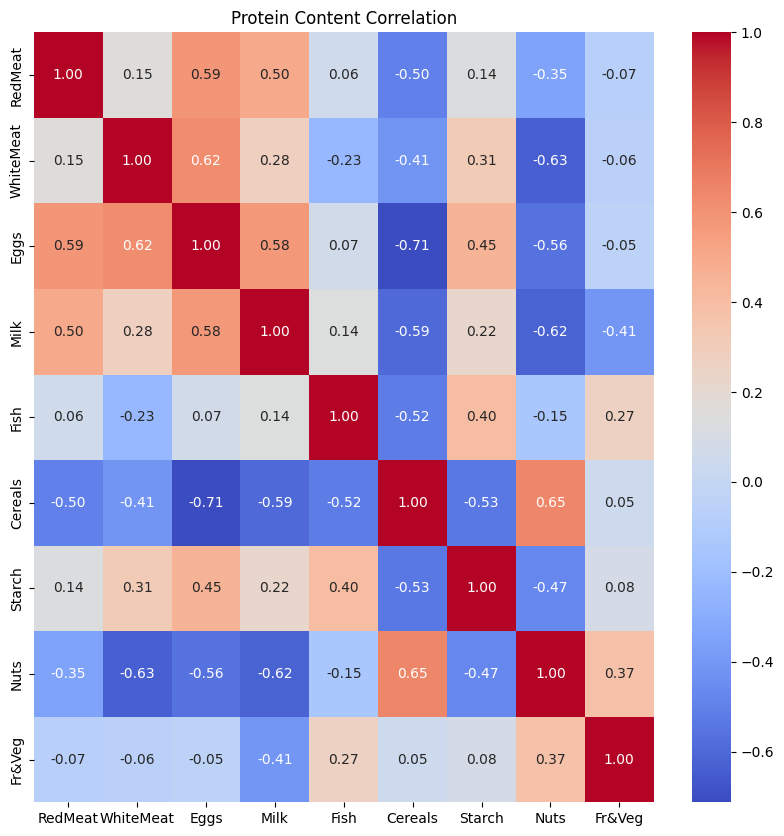

In [ ]:
#building the correlation matrix
cm = numeric_pc.corr()
#plot the heat map
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Protein Content Correlation')
plt.show()

***MODELING ***

In [ ]:
# Creating a new column of total protein content per country
pc['TotalProtein'] = pc[['RedMeat', 'WhiteMeat', 'Eggs', 'Milk', 'Fish', 'Cereals', 'Starch', 'Nuts', 'Fr&Veg']].sum(axis=1)

print(pc)

           Country  RedMeat  WhiteMeat  Eggs  Milk  Fish  Cereals  Starch  \
0          Albania     10.1        1.4   0.5   8.9   0.2     42.3     0.6   
1          Austria      8.9       14.0   4.3  19.9   2.1     28.0     3.6   
2          Belgium     13.5        9.3   4.1  17.5   4.5     26.6     5.7   
3         Bulgaria      7.8        6.0   1.6   8.3   1.2     56.7     1.1   
4   Czechoslovakia      9.7       11.4   2.8  12.5   2.0     34.3     5.0   
5          Denmark     10.6       10.8   3.7  25.0   9.9     21.9     4.8   
6        E Germany      8.4       11.6   3.7  11.1   5.4     24.6     6.5   
7          Finland      9.5        4.9   2.7  33.7   5.8     26.3     5.1   
8           France     18.0        9.9   3.3  19.5   5.7     28.1     4.8   
9           Greece     10.2        3.0   2.8  17.6   5.9     41.7     2.2   
10         Hungary      5.3       12.4   2.9   9.7   0.3     40.1     4.0   
11         Ireland     13.9       10.0   4.7  25.8   2.2     24.0     6.2   

In [ ]:
x= numeric_pc.drop('RedMeat', axis=1)
Y=numeric_pc['RedMeat']

from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2,random_state=42)

from sklearn.linear_model import LinearRegression
modelpc=LinearRegression()
model=modelpc.fit(x_train,Y_train)
model

LinearRegression()

The linear regression model is a model in Y= B0+B1X1+B2X2...+BnXn+e

where;

Y-the dependent variable

B0-intercept

X1,X2...Xn-independent variables

B1,B2,...Bn- coefficients

e-error term

In [ ]:
model.intercept_

6.735430698072878

In [ ]:
model.coef_

array([-0.60148474,  3.35586439,  0.0735157 , -0.37511039,  0.02352547,
       -0.27678229, -0.49887054, -0.12223418])

In [ ]:
y_pred=model.predict(x_train)
y_pred

array([ 9.09450047,  9.43309291, 11.90825005,  8.31461043,  9.32447476,
       12.01074819, 10.45203718,  7.36640932,  7.3261822 ,  7.82896827,
        9.98155903,  5.74335595, 16.15223857,  8.38588686,  5.47839263,
       11.68795994,  6.23855353,  9.18329341, 11.28365002,  8.90583629])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(Y_train,y_pred)

2.1667564010989078

A mean squared error (MSE) of 2.166 indicates a reasonably good model fit. Lower MSE signifies less variation between the predicted values and the actual values.

In [ ]:
r2_score(Y_train,y_pred)

0.7362912439824976

The R-squared score of 0.736 indicates that the model captures about 73.6% of the data's variance. This suggests that the model is relatively efficient.

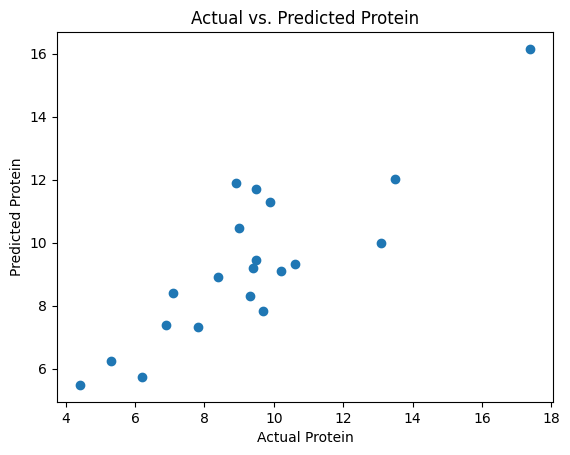

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(Y_train, y_pred) # Use the test data for the actual values
plt.xlabel("Actual Protein")
plt.ylabel("Predicted Protein")
plt.title("Actual vs. Predicted Protein")
plt.show()

The data points in the scatter plot cluster along a diagonal line, suggesting the model's predictions are accurate.